In [76]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [90]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [91]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [102]:
batch_size = 128
epochs = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [103]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 102 images belonging to 7 classes.
Found 88 images belonging to 7 classes.
Found 13 images belonging to 1 classes.


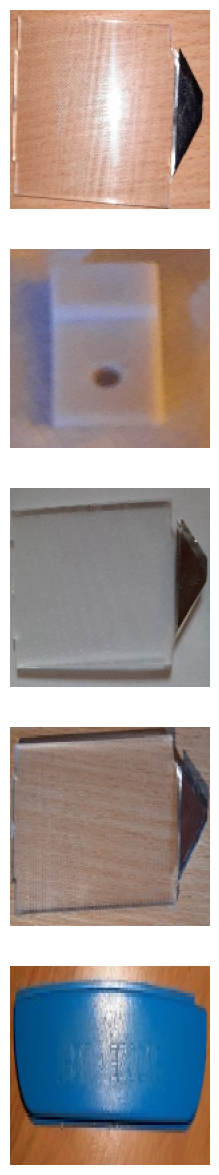

In [104]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 102 images belonging to 7 classes.


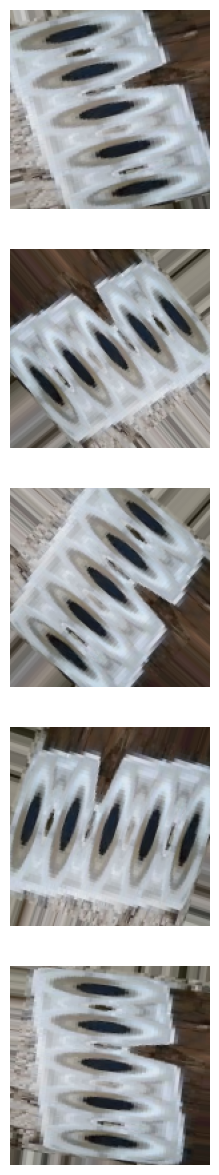

In [105]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [106]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 102 images belonging to 7 classes.


In [107]:
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7))
"""
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, input_dim=784))
model.add(Dense(64, input_dim=784))
model.add(Dense(7, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 360000)            0         
                                                                 
 dense_24 (Dense)            (None, 64)                23040064  
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 7)                 455       
                                                     

In [108]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [109]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/128
1/1 [==============================] - 3s 3s/step - loss: 1.9755 - accuracy: 0.1176 - val_loss: 75.5984 - val_accuracy: 0.1932
Epoch 2/128
1/1 [==============================] - 2s 2s/step - loss: 70.8248 - accuracy: 0.2059 - val_loss: 56.3366 - val_accuracy: 0.3409
Epoch 3/128
1/1 [==============================] - 2s 2s/step - loss: 55.4175 - accuracy: 0.3431 - val_loss: 54.3214 - val_accuracy: 0.2955
Epoch 4/128
1/1 [==============================] - 2s 2s/step - loss: 55.1017 - accuracy: 0.2745 - val_loss: 29.7570 - val_accuracy: 0.3068
Epoch 5/128
1/1 [==============================] - 2s 2s/step - loss: 30.6267 - accuracy: 0.3137 - val_loss: 11.4853 - val_accuracy: 0.4318
Epoch 6/128
1/1 [==============================] - 2s 2s/step - loss: 12.3690 - accuracy: 0.3824 - val_loss: 7.1667 - val_accuracy: 0.3295
Epoch 7/128
1/1 [==============================] - 2s 2s/step - loss: 7.5359 - accuracy: 0.3039 - val_loss: 2.9903 - val_accuracy: 0.4318
Epoch 8/128
1/1 [=======

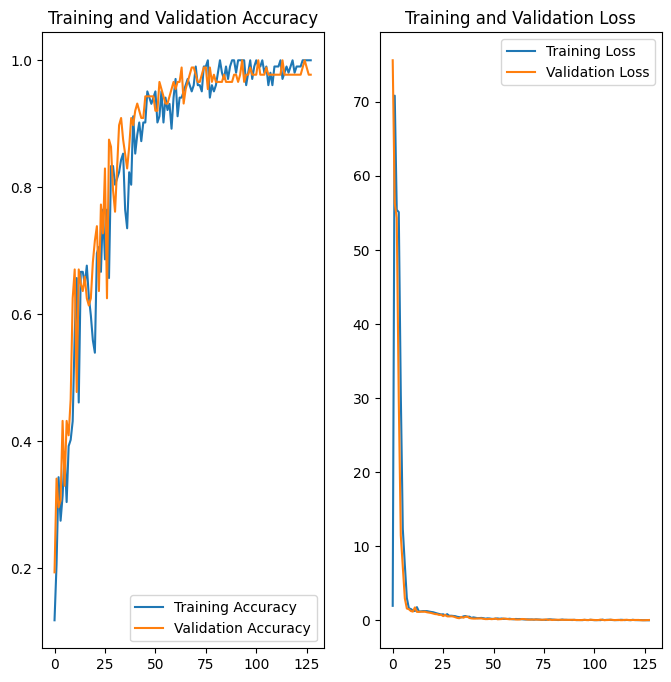

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
#save model

model.save('./saved_model/97_percent')

INFO:tensorflow:Assets written to: ./saved_model/97_percent\assets


INFO:tensorflow:Assets written to: ./saved_model/97_percent\assets


1/1 [==============================] - 0s 110ms/step


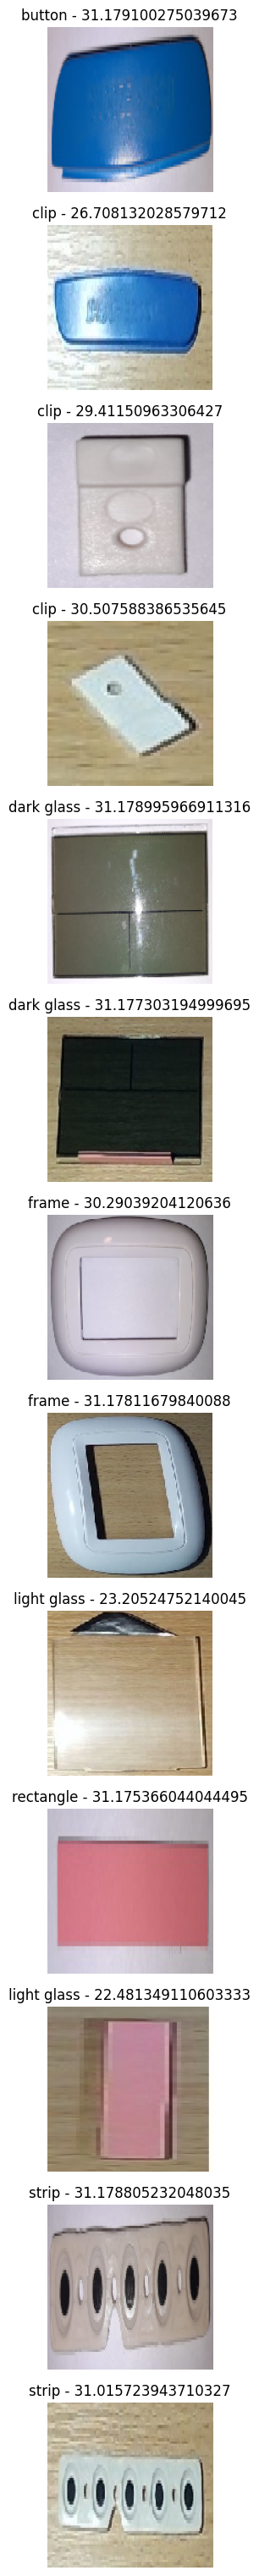

In [111]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)


predictionPercent = []
predictionLabel = []
name = ["button", "clip", "dark glass", "frame", "light glass", "rectangle", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
